In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # necessary to reduce biases of large number
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [ ]:
df = pd.read_csv('C:\\Users\\Ярослав\\Machine Learning\\Lab_3\\exams.csv')
df.dropna()
df['gender'] = df['gender'].replace(["male", "female"], [0, 1])
df['test preparation course'] = df['test preparation course'].replace(["none", "completed"], [0, 1])
df = df.drop(columns =['parental level of education', 'lunch'])
df.head()

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,0,group A,1,67,67,63
1,1,group D,0,40,59,55
2,0,group E,0,59,60,50
3,0,group B,0,77,78,68
4,0,group E,1,78,73,68


In [16]:
X = df.copy()
y = X.pop('race/ethnicity')
y = y.replace(["group A", "group B", "group C", "group D", "group E"], [0, 0, 1, 1, 1])
for i in range(0, len(X['math score'])):
    if((X['math score'][i] > 0) & (X['math score'][i] <= 30)):
         X['math score'][i] = 0
    elif((X['math score'][i] > 30) & (X['math score'][i] <= 65)):
        X['math score'][i] = 1
    else:
        X['math score'][i] = 2
    if((X['reading score'][i] > 0) & (X['reading score'][i] <= 30)):
         X['reading score'][i] = 0
    elif((X['reading score'][i] > 30) & (X['reading score'][i] <= 65)):
        X['reading score'][i] = 1
    else:
        X['reading score'][i] = 2
    if((X['writing score'][i] > 0) & (X['writing score'][i] <= 30)):
         X['writing score'][i] = 0
    elif((X['writing score'][i] > 30) & (X['writing score'][i] <= 65)):
        X['writing score'][i] = 1
    else:
        X['writing score'][i] = 2
print(X)

     gender  test preparation course  math score  reading score  writing score
0         0                        1           2              2              1
1         1                        0           1              1              1
2         0                        0           1              1              1
3         0                        0           2              2              2
4         0                        1           2              2              2
..      ...                      ...         ...            ...            ...
995       0                        0           2              2              1
996       0                        1           2              2              2
997       1                        0           1              1              1
998       1                        0           2              2              2
999       0                        1           1              1              1

[1000 rows x 5 columns]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
text_representation = tree.expo rt_text(clf)
print(text_representation)
print("Accuracy of the model:",clf.score(X_test,y_test))

|--- feature_2 <= 1.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  1.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: 1
|--- feature_2 >  1.50


In [13]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7233333333333334


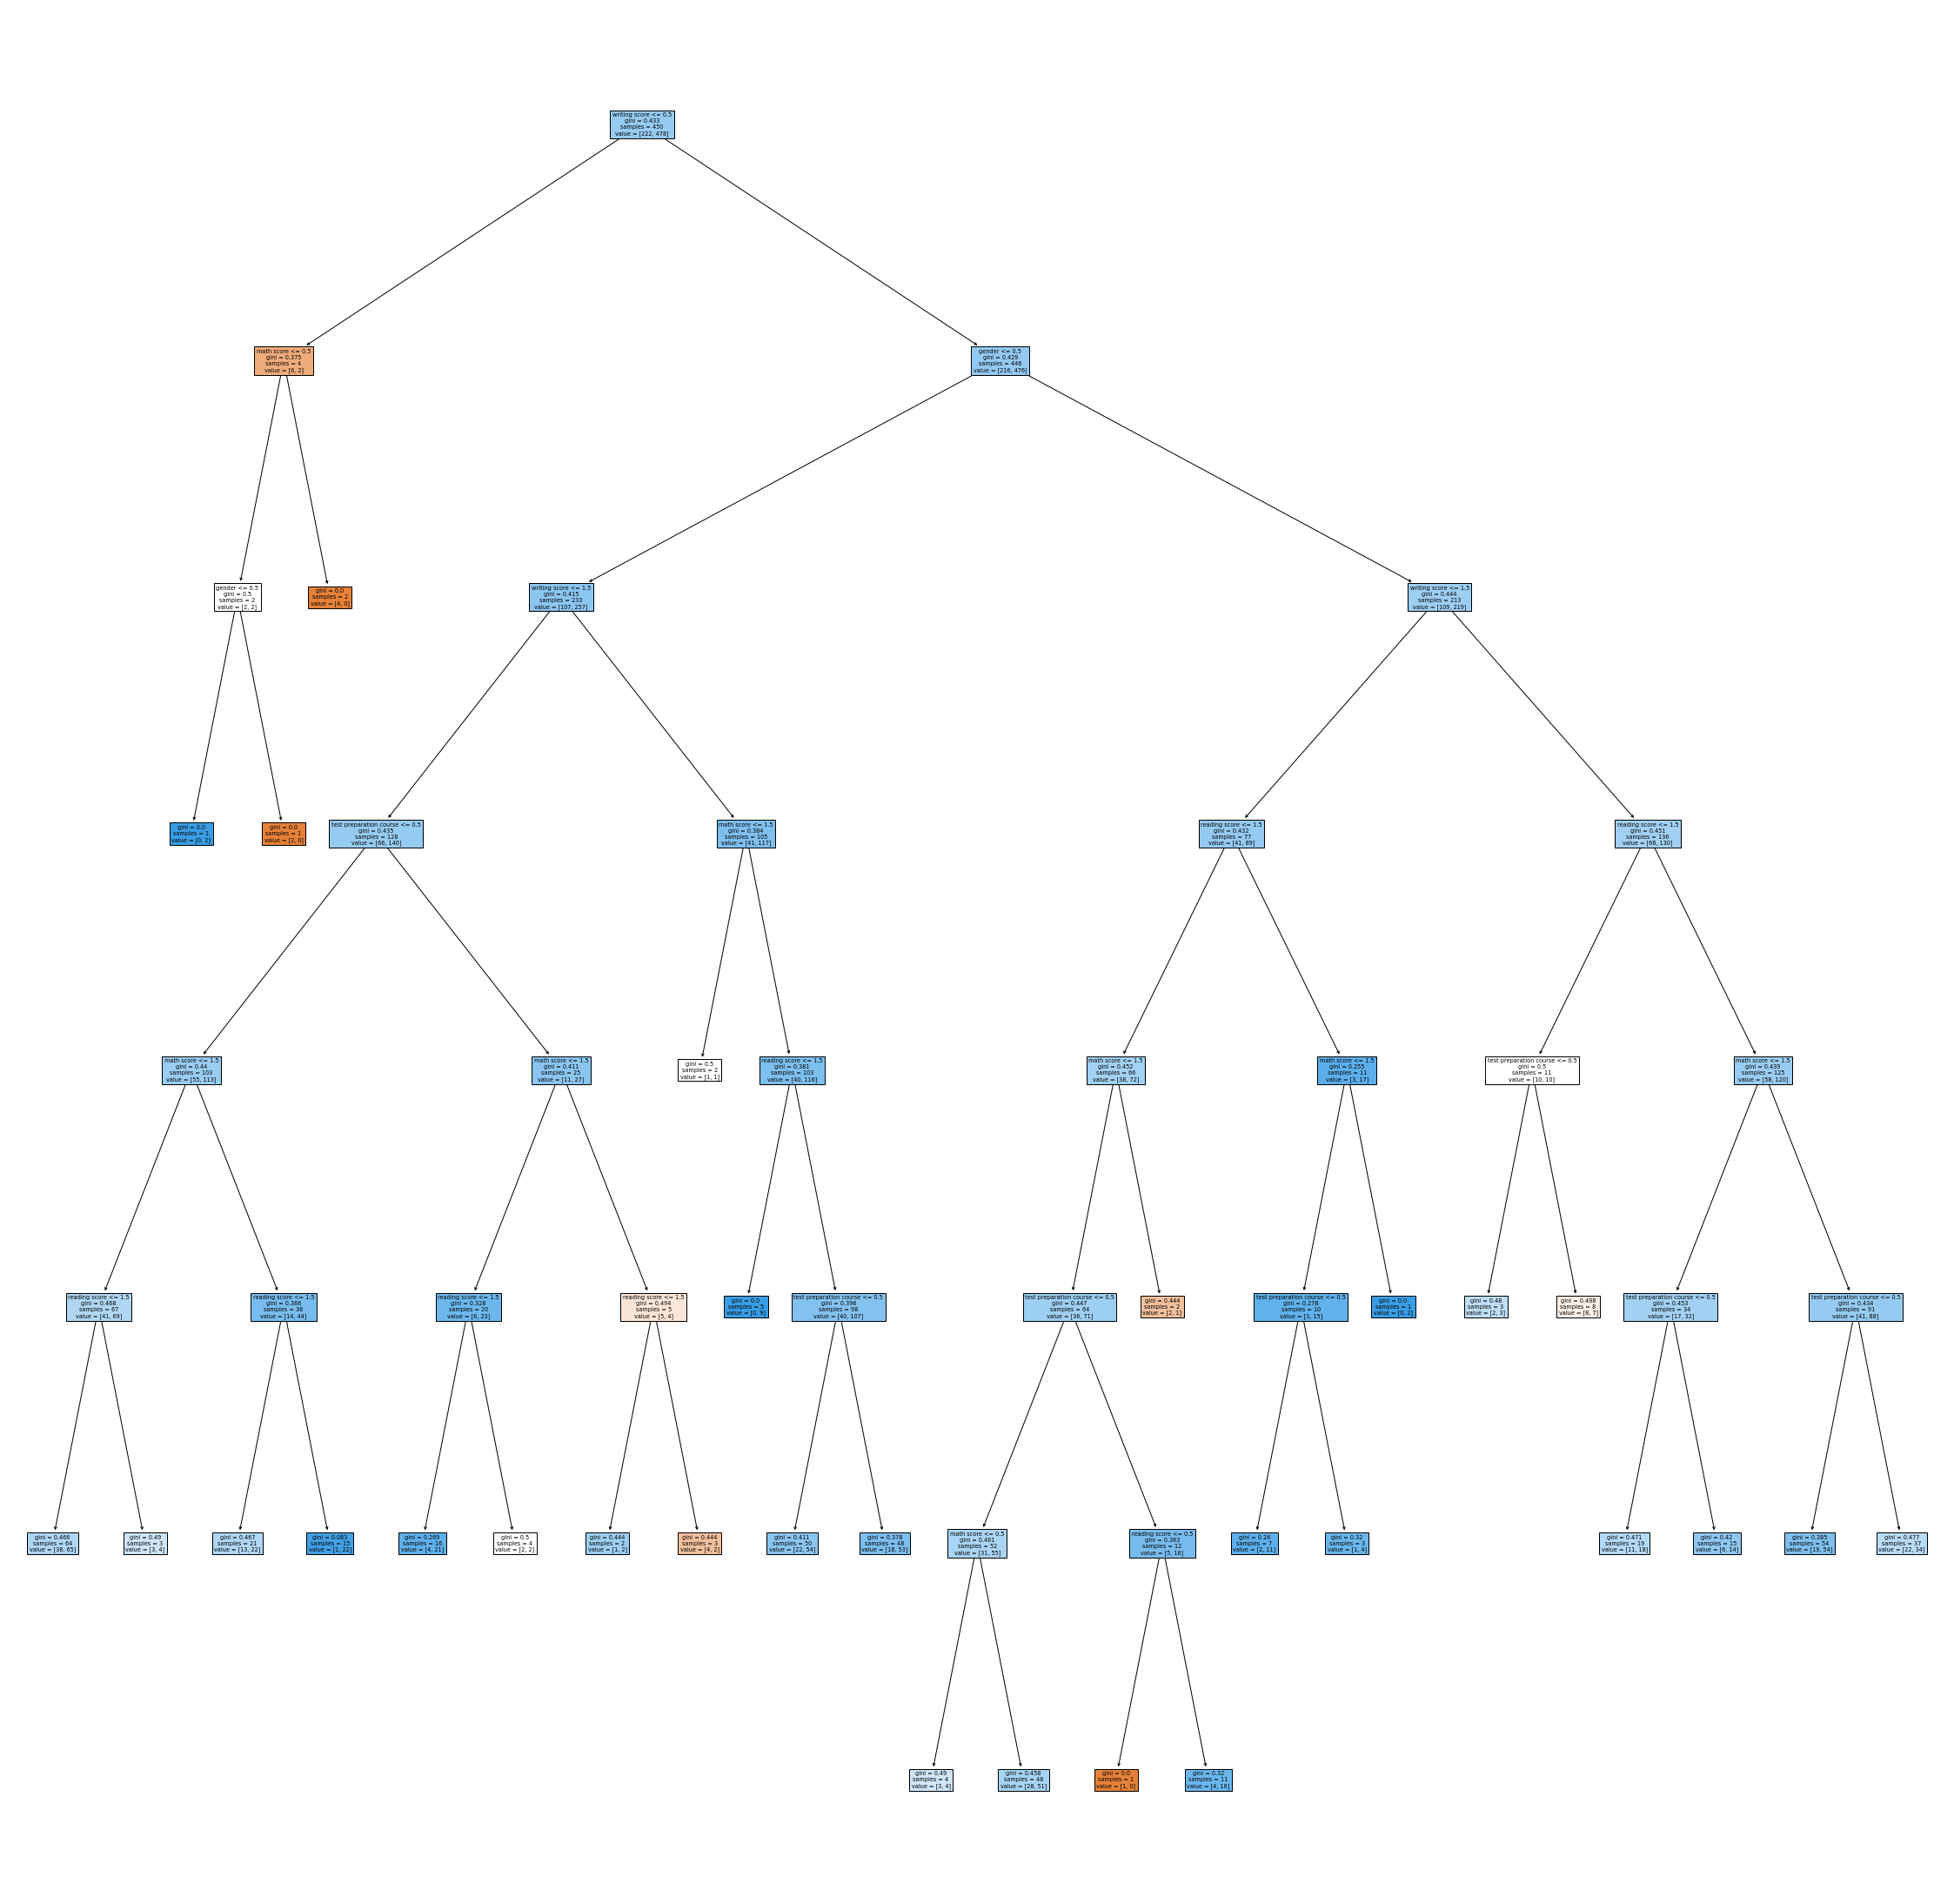

In [15]:
plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X_train.columns, filled=True)